In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

local_path = '/Users/csizi/Development/marathon_statistics/dataset/csv/bszm_2008_2020/'

bszm = pd.read_csv(local_path + 'bszm_cleaned.csv', encoding = "utf8", 
                    sep=';', header=0)

In [275]:
bszm.drop(['Category/Placement', 'event_year', '1.day/1.length', '1.day/2.length', '1.day/3.length', '1.day/length', '2.day/1.length', '2.day/2.length', '2.day/3.length', '2.day/length',
           '3.day/1.length', '3.day/2.length', '3.day/3.length', '3.day/length', '4.day/1.length', '4.day/2.length', '4.day/3.length', '4.day/length', 'event_length'], axis = 1, inplace=True)

In [276]:
bszm.drop(['Name', 'Born', 'Team', 'City', '1.day/1.time', '1.day/2.time', '1.day/3.time', '1.day/sum', '2.day/1.time'
           , '2.day/2.time', '2.day/3.time', '2.day/sum', '3.day/1.time', '3.day/2.time', '3.day/3.time', '3.day/sum', '4.day/1.time', '4.day/2.time'
           , '4.day/3.time', '4.day/sum'], axis = 1, inplace=True)

In [277]:
bszm.drop(['1/1_tempo', '1/2_tempo', '1/3_tempo', '1_tempo', '2/1_tempo', '2/2_tempo', '2/3_tempo', '2_tempo'
           ,'3/1_tempo', '3/2_tempo', '3/3_tempo', '3_tempo'
           , '4/1_tempo', '4/2_tempo', '4/3_tempo', '4_tempo', 'finisher_result', 'Gender', 'Placement'], axis = 1, inplace=True)

In [278]:
bszm = bszm.sample(frac = 1)

In [279]:
bszm[bszm['average_tempo(minutes/km)'].astype(str) == 'nan'] = np.nan
bszm = bszm.dropna()

In [280]:
bszm[bszm['average_tempo(minutes/km)'].astype(str) == 'nan']

,Category,Country,Number,Result,Ran km,finished,age,average_tempo(minutes/km),tempo_category,club_member


In [281]:
bszm.shape

(2461, 10)

In [282]:
X = bszm.iloc[:, [0, 1, 6, 7, 8]].values
y = bszm.iloc[:, [5]].values
X

array([['F2', 'HUN', 38.0, 5.661880341880342, 'mid fast'],
       ['M3', 'HUN', 42.0, 4.876020408163265, 'fast'],
       ['M4', 'SWE', 52.0, 6.868221070811744, 'mid slow'],
       ...,
       ['M2', 'HUN', 34.0, 5.238316151202749, 'fast'],
       ['M2', 'HUN', 33.0, 7.351632302405498, 'slow'],
       ['M2', 'HUN', 33.0, 6.414871794871796, 'average']], dtype=object)

In [283]:
y

array([[True],
       [True],
       [True],
       ...,
       [True],
       [True],
       [True]], dtype=object)

In [284]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,1] = le.fit_transform(X[:,1])
X[:,3] = le.fit_transform(X[:,3])
X[:,4] = le.fit_transform(X[:,4])
y = le.fit_transform(y)
X

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[1, 16, 38.0, 638, 2],
       [6, 16, 42.0, 109, 1],
       [7, 35, 52.0, 1843, 3],
       ...,
       [5, 16, 34.0, 291, 1],
       [5, 16, 33.0, 2192, 4],
       [5, 16, 33.0, 1422, 0]], dtype=object)

In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [286]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [287]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [288]:
y_pred  =  classifier.predict(X_test)


In [289]:
y_pred  

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [290]:
y_test


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [291]:
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

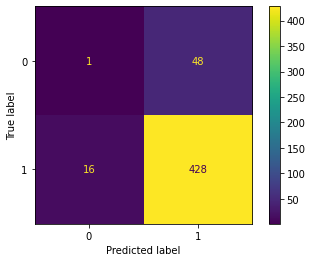

In [292]:
disp.plot()

In [293]:
cm

array([[  1,  48],
       [ 16, 428]])

In [294]:
ac

0.8701825557809331